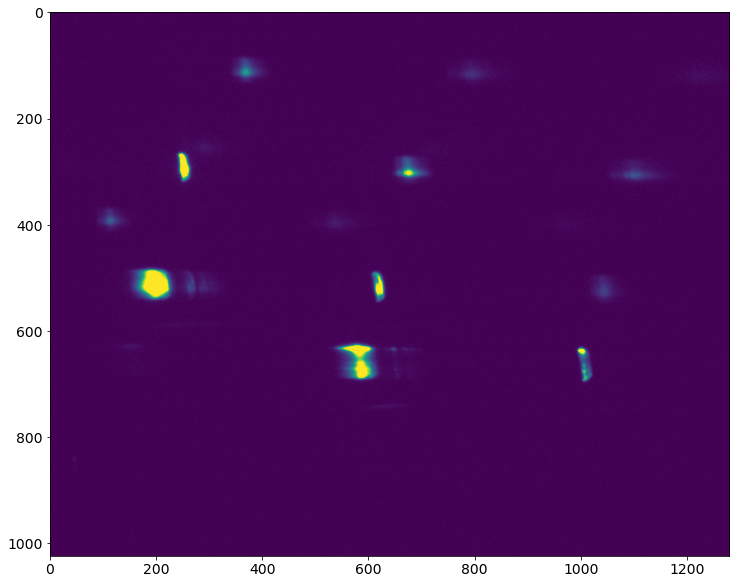

In [888]:
import sys
import numpy as np
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import os
import pandas as pd
import ipywidgets as widgets

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]  # Nastaví výchozí velikost obrázků na 10x6 palců
plt.rcParams['font.size'] = 14            # Nastaví výchozí velikost písma na 14

metadata = {}


filename = "/var/nfs/shared/vid_2023-12-31_11-04-39/_000387.tiff"  # sodikova lampa
metadata = {'x1': 0, 'y1': 288, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 252}
#metadata = {'x1': 0, 'y1': 512, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 619}
#metadata = {'x1': 0, 'y1': 668, 'rot': 0.7, 'length': 1260, 'width': 6, 'zero_px': 1006}

#filename = "/var/nfs/shared/vid_2023-12-31_11-51-28/_000114.tiff"
#metadata = {'x1': 0, 'y1': 328, 'rot': 0.7, 'length': 1260, 'width': 7, 'zero_px': 638}
#metadata = {'x1': 0, 'y1': 465, 'rot': 0.7, 'length': 1260, 'width': 4, 'zero_px': 772}

#filename = "/var/nfs/shared/vid_2023-12-31_16-39-30/_002729.tiff"
#metadata = {'x1': 0, 'y1': 546, 'rot': 0.7, 'length': 1260, 'width': 7, 'zero_px': 728}
#metadata = {'x1': 0, 'y1': 546, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 729}

#filename = "/var/nfs/shared/vid_2023-12-31_16-08-59/_000073.tiff"
#metadata = {'x1': 0, 'y1': 699, 'rot': 0.7, 'length': 1260, 'width': 5, 'zero_px': 723}
#metadata = {'x1': 0, 'y1': 646, 'rot': 0.7, 'length': 1260, 'width': 2, 'zero_px': 723}


#filename = "/var/nfs/shared/vid_2023-12-31_16-08-59/_000219.tiff"
#metadata = {'x1': 0, 'y1': 522, 'rot': 0.7, 'length': 1260, 'width': 1, 'zero_px': 919}
#metadata = {'x1': 0, 'y1': 521, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 919}
#metadata = {'x1': 0, 'y1': 396, 'rot': 0.7, 'length': 1260, 'width': 10, 'zero_px': 919}
#metadata = {'x1': 0, 'y1': 736, 'rot': 0.7, 'length': 1260, 'width': 1, 'zero_px': 1164}

#filename = "/var/nfs/shared/vid_2023-12-31_16-23-06/_000435.tiff"
#metadata = {'x1': 0, 'y1': 395, 'rot': 0.7, 'length': 1260, 'width': 9, 'zero_px': 649}

#filename = "/var/nfs/shared/lasergreen/_000004.tiff"
#metadata = {'x1': 0, 'y1': 186, 'rot': 0.7, 'length': 1260, 'width': 5, 'zero_px': 714}


#filename = "/var/nfs/shared/vid_2023-12-31_15-04-08/_004546.tiff"
#metadata = {'x1': 0, 'y1': 470, 'rot': 0.7, 'length': 1260, 'width': 2, 'zero_px': 747}
#metadata = {'x1': 0, 'y1': 363, 'rot': 0.7, 'length': 1260, 'width': 2, 'zero_px': 239}

#filename = "/var/nfs/shared/vid_2023-12-31_15-45-47/_001651.tiff"
#metadata = {'x1': 0, 'y1': 639, 'rot': 0.7, 'length': 1272, 'width': 3, 'zero_px': 1270}
#metadata = {'x1': 0, 'y1': 354, 'rot': 0.7, 'length': 1272, 'width': 3, 'zero_px': 814}
#metadata = {'x1': 0, 'y1': 638, 'rot': 0.7, 'length': 1272, 'width': 3, 'zero_px': 1270}


img = tiff.imread(filename)

img_array = np.array(img)
plt.imshow(img)

In [889]:
import os
# Získání základního názvu souboru bez přípony a cesty k podsložce
file_base_name = os.path.basename(filename)
file_name_without_ext = os.path.splitext(file_base_name)[0]
output_directory = os.path.join(os.path.dirname(filename), file_name_without_ext)

# Vytvoření podsložky pokud neexistuje
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

print(output_directory)
metadata

/var/nfs/shared/vid_2023-12-31_11-04-39/_000387


{'x1': 0, 'y1': 288, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 252}

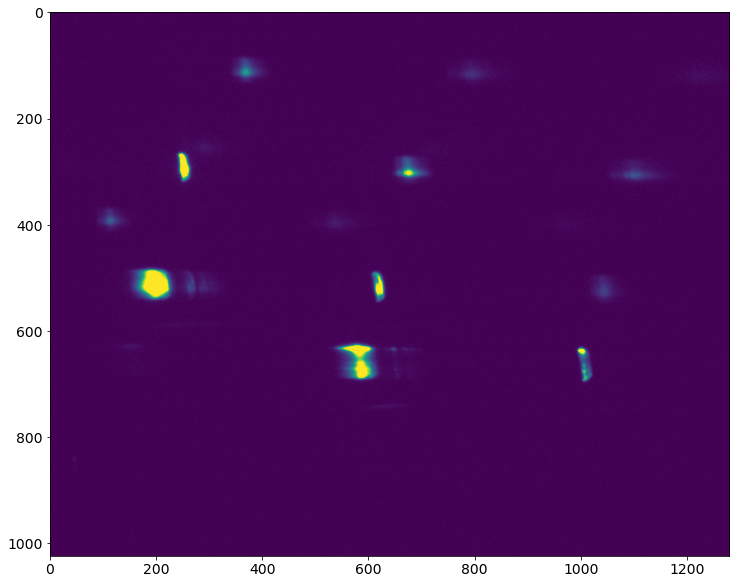

In [890]:
plt.imshow(img)
cropped_image = img

In [891]:
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.patches import Rectangle
from scipy.signal import find_peaks
spektrum = None

In [892]:

# def plot_image_crop(x, y, width, height):
#     global cropped_image
#     # Omezení šířky a výšky výřezu tak, aby nevyšly mimo obrázek
#     width = min(width, img.shape[1] - x)
#     height = min(height, img.shape[0] - y)
    
#     fig, ax = plt.subplots()
#     ax.imshow(img, cmap='gray')

#     # Vytvoření a přidání obdélníku (čtverce) reprezentujícího výřez
#     rect = Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)

#     plt.show()

#     cropped_image = img[y:y + height, x:x + width]
#     plt.imshow(cropped_image, cmap='gray')
#     plt.show()

# # Nastavte výchozí hodnoty posuvníků podle rozměrů img
# interact(plot_image_crop, 
#          x=IntSlider(min=0, max=img.shape[1]-1, value=0, description='X:', layout=widgets.Layout(width='800px')),
#          y=IntSlider(min=0, max=img.shape[0]-1, value=0, description='Y:', layout=widgets.Layout(width='800px')),
#          width=IntSlider(min=1, max=img.shape[1], value=img.shape[1], description='Šířka:', layout=widgets.Layout(width='800px')),
#          height=IntSlider(min=1, max=img.shape[0], value=img.shape[0], description='Výška:', layout=widgets.Layout(width='800px')))



In [893]:

from scipy.ndimage import map_coordinates

def line_profile(img, x1, y1, length, angle):
    # Výpočet x, y souřadnic podél úsečky
    x = x1 + np.arange(length) * np.cos(np.radians(angle))
    y = y1 + np.arange(length) * np.sin(np.radians(angle))

    # Extrahování hodnot pixelů podél úsečky
    return map_coordinates(img, [y, x], order=1)


def line_profile_avg(img, x1, y1, length, angle, width):
    # Výpočet x, y souřadnic podél úsečky
    x = x1 + np.arange(length) * np.cos(np.radians(angle))
    y = y1 + np.arange(length) * np.sin(np.radians(angle))

    # Výpočet normály k úsečce
    normal_angle = angle + 90
    dx = np.cos(np.radians(normal_angle))
    dy = np.sin(np.radians(normal_angle))

    # Extrahování a průměrování hodnot pixelů podél úsečky a jejích okolí
    profile = np.zeros(length)
    for i in range(-width // 2, width // 2 + 1):
        xi = x + i * dx
        yi = y + i * dy
        profile += map_coordinates(img, [yi, xi], order=1)

    return profile / width

pixels = None

def plot_image_with_line_angle(x1, y1, angle, line_length, line_width, save=False):
    global spektrum, metadata
    # Výpočet koncového bodu úsečky
    
    metadata['x1'] = x1
    metadata['y1'] = y1
    metadata['rot'] = angle
    metadata['length'] = line_length
    metadata['width'] = line_width
    
    x2 = x1 + line_length * np.cos(np.radians(angle))
    y2 = y1 + line_length * np.sin(np.radians(angle))

    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    plt.title(filename)


    # Vytvoření a vykreslení úsečky
    ax.plot([x1, x2], [y1, y2], color='red', linewidth=line_width, linestyle="dotted")
    plt.tight_layout()
    if save:
        plt.savefig(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_line_select.png")
    plt.show()
    
    # Vytvoření a vykreslení profilu
    #profile = line_profile(img, x1, y1, line_length, angle)
    spektrum = line_profile_avg(img, x1, y1, line_length, angle, line_width)
    plt.plot(np.arange(line_length), spektrum, 'r-')

    plt.tight_layout()
    plt.show()
    
    print(metadata)
    
# Interaktivní posuvníky pro zadání počátečního bodu, úhlu, délky a šířky úsečky
interact(plot_image_with_line_angle, 
         x1=IntSlider(min=0, max=img.shape[1]-1, value=metadata.get('x1', 0), description='X1:', layout=widgets.Layout(width='800px')),
         y1=IntSlider(min=0, max=img.shape[0]-1, value=metadata.get('y1', 0), description='Y1:', layout=widgets.Layout(width='800px')),
         angle=FloatSlider(min=-10, max=10, value=metadata.get('rot', 0), description='Úhel (°):', layout=widgets.Layout(width='800px')),
         line_length=IntSlider(min=1, max=1500, value=metadata.get('length', 1200), description='Délka čáry:', layout=widgets.Layout(width='800px')),
         line_width=IntSlider(min=1, max=10, value=metadata.get('width', 3), description='Šířka čáry:', layout=widgets.Layout(width='800px')))


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_image_with_line_angle(x1, y1, angle, line_length, line_width, save=False)>

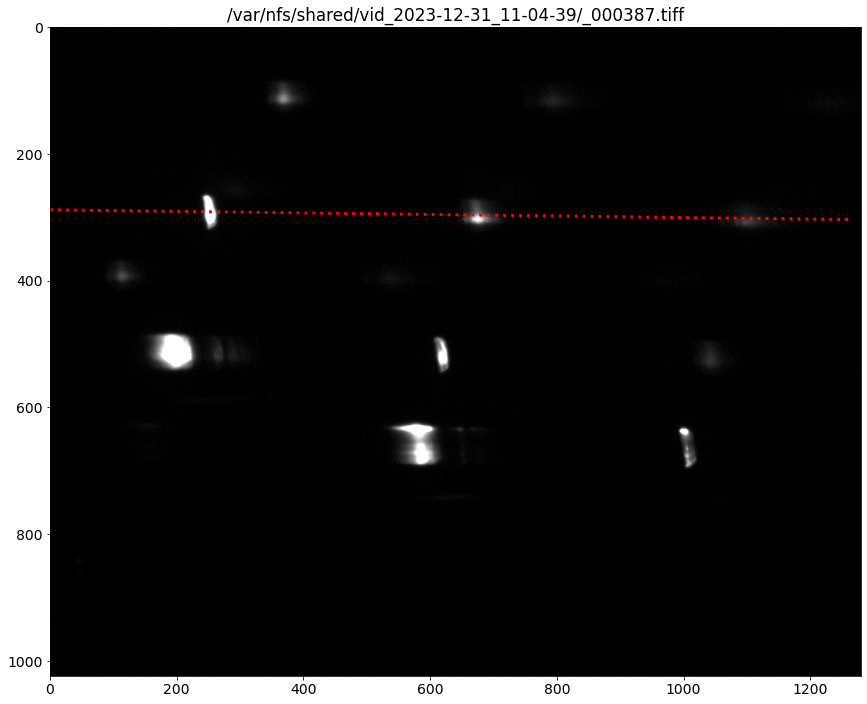

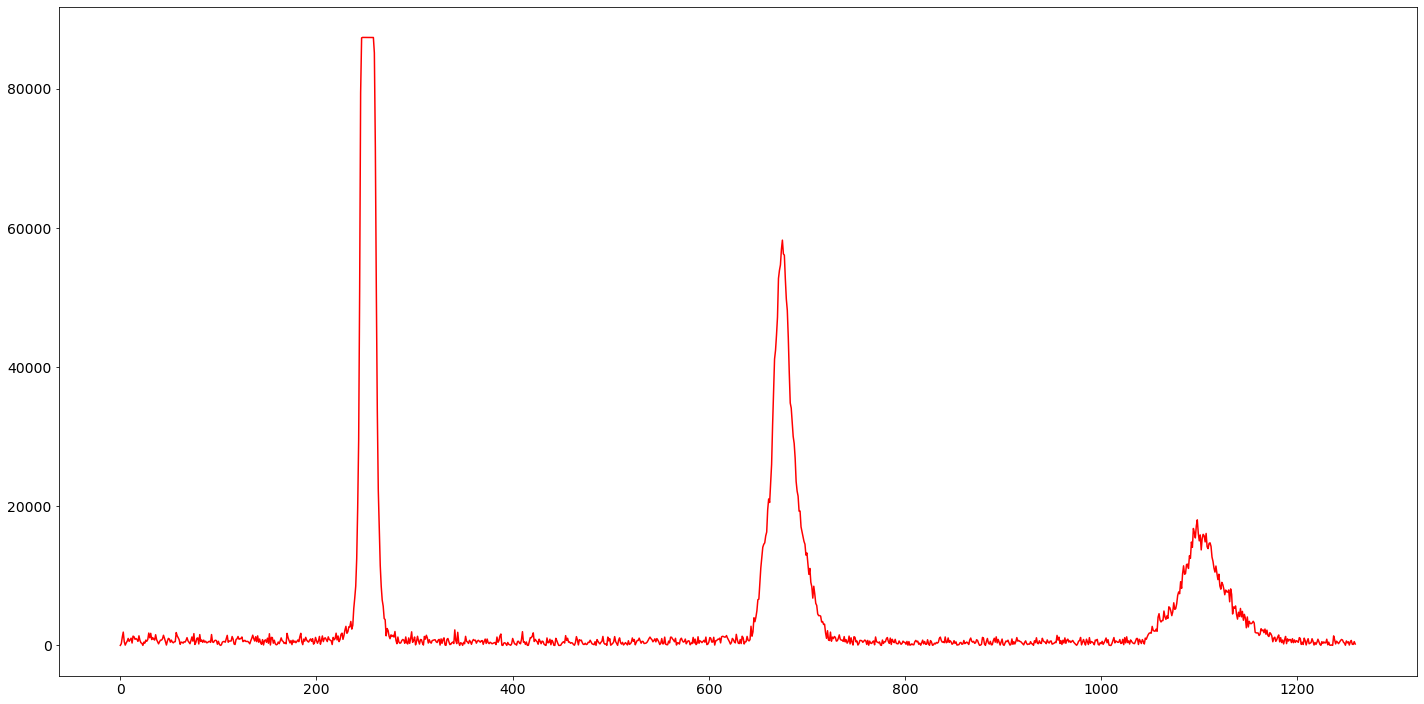

{'x1': 0, 'y1': 288, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 252}


In [894]:
# Ulozit aktualni rez do png

plot_image_with_line_angle(metadata['x1'], metadata['y1'], metadata['rot'], metadata['length'], metadata['width'], True)

In [895]:
# spektrum = np.mean(cropped_image, axis=0)
# plt.plot(spektrum)

In [896]:

default_zero_pixel = 50
zero_pixel = 0

def plot_spectra_with_zero_pixel(zero_pixel_in):
    # Výpočet vlnových délek
    global zero_pixel
    zero_pixel = zero_pixel_in
    pixels = np.arange(len(spektrum))
    wavelengths_order_1 = pixel_to_wavelength(pixels, zero_pixel, order=1)
    wavelengths_order_2 = pixel_to_wavelength(pixels, zero_pixel, order=2)

    # Vykreslení grafu
    fig, ax1 = plt.subplots()
    ax1.plot(pixels, spektrum, 'b-')
    ax1.set_xlabel('Pixel')
    ax1.set_ylabel('Intenzita', color='b')

    # Přidání ukazatele pro nulový pixel
    ax1.axvline(x=zero_pixel, color='k', linestyle='--')
    ax1.text(zero_pixel, max(spektrum), ' Nutlý pixel', verticalalignment='bottom')
    metadata['zero_px'] = zero_pixel

    plt.show()

# Vytvoření interaktivního posuvníku
zero_pixel_slider = IntSlider(value=metadata.get('zero_px', default_zero_pixel), min=-100, max=len(spektrum)-1, step=1, description='Nulový pixel:', continuous_update=True, layout=widgets.Layout(width='800px'))

# Použití interact pro interaktivní vykreslení grafu
interact(plot_spectra_with_zero_pixel, zero_pixel_in=zero_pixel_slider)


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plot_spectra_with_zero_pixel(zero_pixel_in)>

[   3   19   29   44   57   75   93  109  120  135  152  170  184  206
  220  235  252  272  283  297  312  330  341  352  388  410  421  435
  454  465  492  504  522  540  555  572  589  605  618  628  646  661
  675  693  703  713  724  743  770  782  841  867  879  893  914  934
  955  979 1013 1026 1052 1064 1074 1088 1098 1111 1123 1137 1149 1163
 1181 1202 1237]


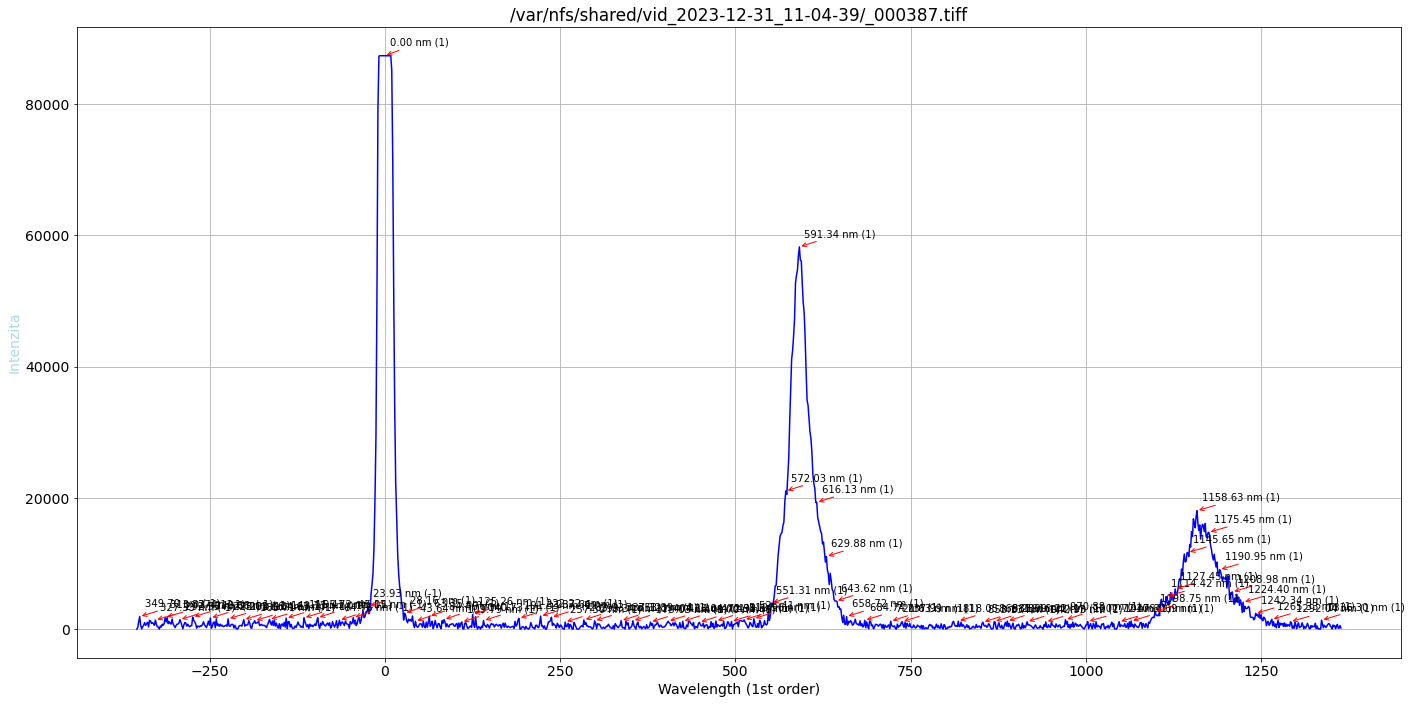

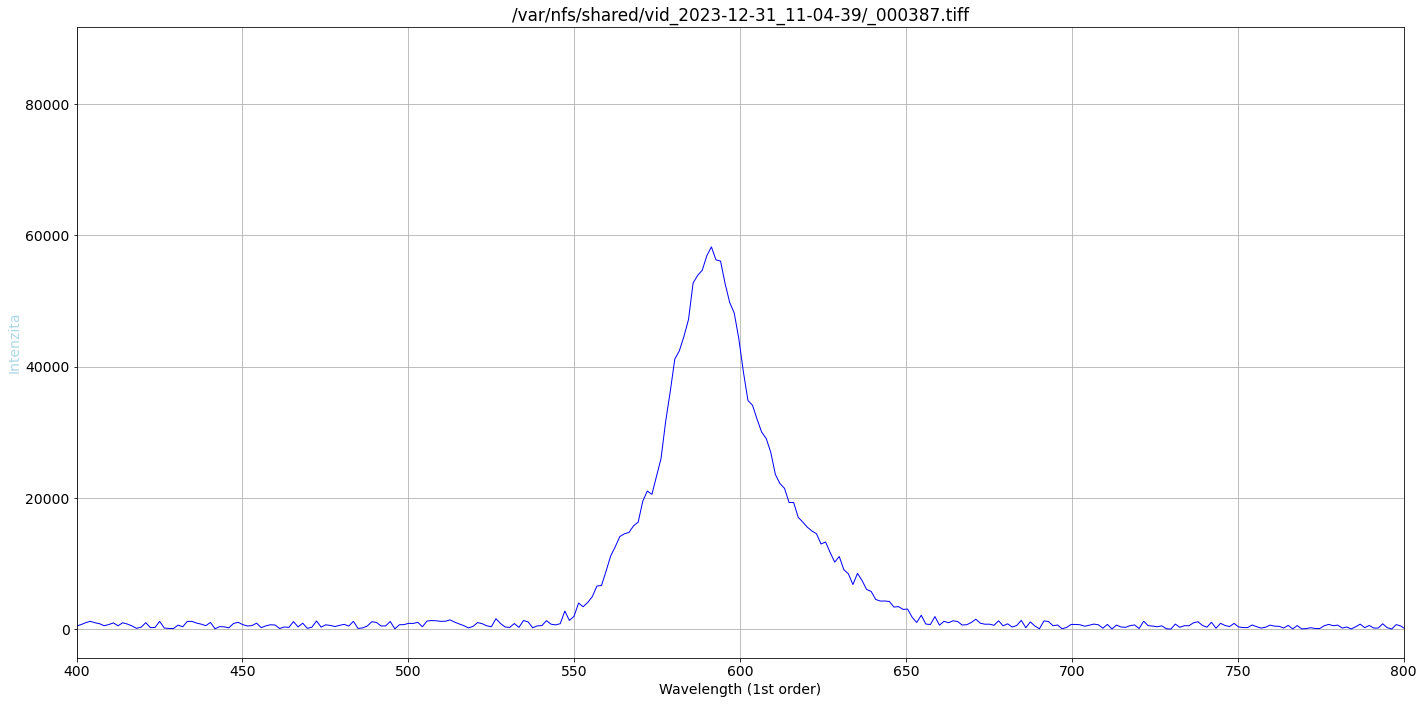

In [897]:
# L=11.7+36-12.1
def pixel_to_wavelength(pixel_position, zero_pixel=0, d=1/100, L=11.7+36-12.185, pixel_size=10, order=1):
    d_m = d / 1000
    L_m = L / 1000
    pixel_size_m = pixel_size / 1000000

    # Přidání offsetu k pozici pixelu
    offset_pixel_position = pixel_position - zero_pixel

    # Výpočet difrakčního úhlu
    theta = np.arctan2(offset_pixel_position * pixel_size_m, L_m)

    # Výpočet vlnové délky
    wavelength_m = d_m * np.sin(theta) / order
    return wavelength_m * 1e9  # Převod na nanometry


def annotate_peaks(ax, x, y, wavelengths, orientation=1):
    # Nalezení peaků
    peaks, _ = find_peaks(y, height=5000, distance = 10)  # Můžete nastavit další parametry pro find_peaks podle potřeby

    # Anotace peaků
    for peak in peaks:
        peak_wavelength = pixel_to_wavelength(peak, zero_pixel, order=orientation*1)
        order = 1
        #if peak_wavelength > 900:
        #    order = 2
        #    peak_wavelength = pixel_to_wavelength(peak, zero_pixel, order=orientation*3)
        ax.annotate(f"{peak_wavelength:.2f} nm ({order})", 
                    xy=(peak, y[peak]), 
                    xytext=(5, 10), 
                    textcoords="offset points", 
                    arrowprops=dict(arrowstyle="->", color='red'),
                    fontsize=10)


source_px = zero_pixel
orientation = 1

# Pole pixelů
pixels = np.arange(len(spektrum))

# Výpočet vlnových délek pro první a druhý řád
wavelengths_order_1 = pixel_to_wavelength(pixels, source_px, order=2*orientation)
wavelengths_order_2 = pixel_to_wavelength(pixels, source_px, order=3*orientation)

# Vytvoření grafu
fig, ax1 = plt.subplots()

# Vykreslení spektra
ax1.plot(wavelengths_order_1, spektrum, 'b-')
ax1.set_xlabel('Wavelength (1st order)')
ax1.set_ylabel('Intenzita', color='lightblue')
plt.title(filename)
plt.grid()

#annotate_peaks(ax1, wavelengths_order_1, spektrum, wavelengths_order_1, orientation=1)

peaks, _ = find_peaks(spektrum, height=1000, distance = 10)
print(peaks)

for peak in peaks:
    
    peak_wl = pixel_to_wavelength(peak, source_px, order=2*orientation)
    order = 1
    #if peak_wavelength > 900:
    #    order = 2
    #    peak_wavelength = pixel_to_wavelength(peak, zero_pixel, order=orientation*3)
    peak_wl_abs = abs(peak_wl)
    if peak_wl<0:
        order *= -1
    ax1.annotate(f"{peak_wl_abs:.2f} nm ({order})", 
                xy=(peak_wl, spektrum[peak]), 
                xytext=(5, 10), 
                textcoords="offset points", 
                arrowprops=dict(arrowstyle="->", color='red'),
                fontsize=10)

# Zobrazení grafu
plt.tight_layout()
plt.savefig(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_spectrum.png")
plt.show()

#plt.imshow(cropped_image)
#plt.show()

fig, ax1 = plt.subplots()
plt.title(filename)

ax1.plot(np.abs(wavelengths_order_1), spektrum, 'b-', lw=1)
ax1.set_xlabel('Wavelength (1st order)')
ax1.set_ylabel('Intenzita', color='lightblue')
ax1.set_xlim([400, 800])
plt.grid(1)
plt.tight_layout()
plt.savefig(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_spectrum_limit.png")
plt.show()



In [898]:
stack = np.column_stack( (pixels-metadata['zero_px'], wavelengths_order_1, spektrum) )
np.savetxt(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_spectrum.csv", stack, delimiter=',', fmt="%d", header="px,wavelength,intensity", comments="")

In [899]:
metadata

{'x1': 0, 'y1': 288, 'rot': 0.7, 'length': 1260, 'width': 3, 'zero_px': 252}

In [900]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader


print(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_out.pdf")
c = canvas.Canvas(f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_out.pdf", pagesize=A4)
width, height = A4  # Šířka a výška stránky A4

# Nastavení nadpisu
c.setFont("Helvetica-Bold", 15)
c.drawCentredString(width / 2.0, height - 25, filename)

c.setFont("Helvetica-Bold", 10)
c.drawCentredString(width / 2.0, height - 40, repr(metadata))


# Vložení obrázku do PDF
def insert_image(pdf, image_path, y_position, description):
    try:
        image = ImageReader(image_path)
        image_width, image_height = image.getSize()
        aspect_ratio = image_width / image_height
        pdf.drawImage(image, 50, y_position, width=width-100, preserveAspectRatio=True)
        #pdf.drawString(50, y_position - 20, description)
    except Exception as e:
        print(f"Chyba při vkládání obrázku {image_path}: {e}")

# Vložení snímku s vyznačením vybrané oblasti
insert_image(c, f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_line_select.png", height - 560, "Snímek s vyznačenou oblastí")

# Vložení spektrálního grafu
insert_image(c, f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_spectrum.png", height - 800, "Výstupní spektrum")

# Vložení spektrálního grafu z viditelné oblasti
insert_image(c, f"{output_directory}/out_{metadata['x1']}_{metadata['y1']}_spectrum_limit.png", height - 1050, "Spektrum z viditelné oblasti")

# Uložení PDF
c.showPage()
c.save()


/var/nfs/shared/vid_2023-12-31_11-04-39/_000387/out_0_288_out.pdf
